In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('C:/Users/Drew/Downloads/jj.csv')

In [7]:
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [8]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [9]:
train = df[:-4]
test = df[-4:]

In [11]:
#Implementing the Historical Mean Baseline
import numpy as np
historical_mean = np.mean(train['data'])
print(historical_mean) #The results mean that from 1960 to 1979, the quarterly EPS is on average 4.31 USD

4.308499987499999


In [15]:
test.loc[:, 'pred_mean'] = historical_mean #.loc is creating a new column

In [16]:
test.head()

,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


# Mean Absolute Percentage Error

this function always return a percentage of mean error no matter we are working with 2 digit values or 6 digit values

In [18]:
def mape(y_true, y_pred): #Function for Mean Absolute Percentage Error
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
print(mape_hist_mean) #The result means that our actual and predicted value is 70% apart from each other

70.00752579965119


# Visualizing our Forecasts

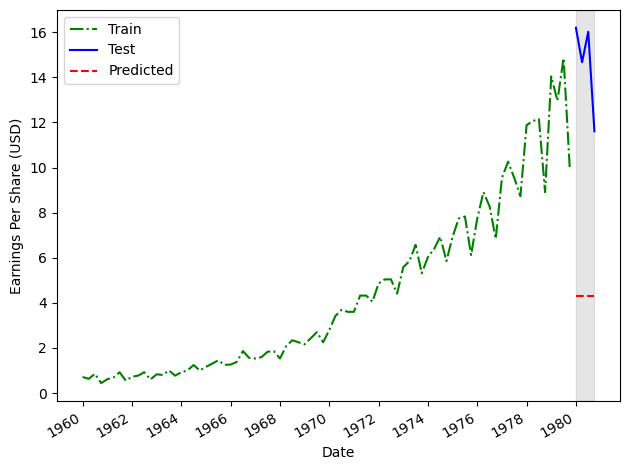

In [27]:
import matplotlib.pyplot as pt

fig, ax = pt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label="Train")
ax.plot(test['date'], test['data'], 'b-', label="Test")
ax.plot(test['date'], test['pred_mean'], 'r--', label="Predicted")
ax.set_xlabel("Date")
ax.set_ylabel("Earnings Per Share (USD)")
ax.axvspan(80, 83, color ="#808080", alpha=0.2) #Draw a rectangular area to illustrate the forecast horizon
ax.legend(loc=2)
#xticks is to specify the label. We dont not want a crowded x-axis with unreadable labels. So, we use np.arange()
#0 is the starting index, 85 is the stopping index which is actually 84, and 8 is the steps because there are 8 quarters in 2 years.
#Then we specify an array containing the labels at each index, so it must stasrt with 1960 and end with 1980.
pt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
pt.tight_layout()

From this training set, we can see a positive trend, as the EPS is increasing over time. This is further supported by trend component coming from the decomposition of our dataset. As we can see, not only do we have a trend, but the trend is not constant between 1960 and 1980, it is getting steeper. Thus, it might be that the EPS observed in 1960 is not predictive of the EPS in 1980, because we have a positive trend, and EPS values are increasing with time and are doing so at a faster rate. 

In [25]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


# Using Year 1979 as the baseline

In [35]:
last_year_mean = np.mean(train.data[-4:])
print(last_year_mean)

12.96


In [30]:
test.loc[ : , 'pred_last_year_mean'] = last_year_mean

In [31]:
test.head()

,date,data,pred_mean,pred_last_year_mean
80,1980-01-01,16.20,4.3085,12.96
81,1980-04-01,14.67,4.3085,12.96
82,1980-07-02,16.02,4.3085,12.96
83,1980-10-01,11.61,4.3085,12.96


In [32]:
mape_last_year_mean = mape(test['data'], test['pred_last_year_mean'])
print(mape_last_year_mean)

15.5963680725103


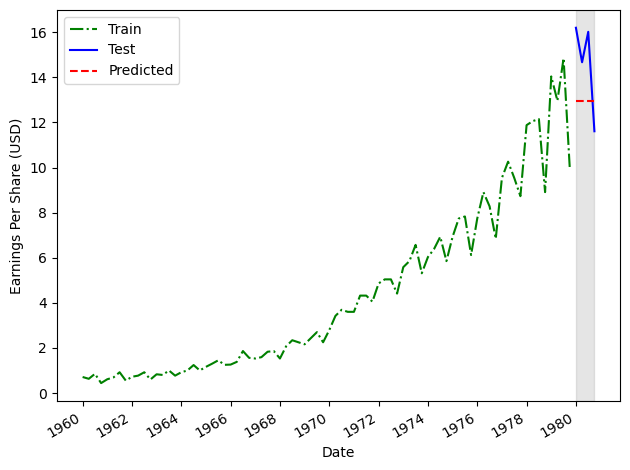

In [36]:
fig, ax = pt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label="Train")
ax.plot(test['date'], test['data'], 'b-', label="Test")
ax.plot(test['date'], test['pred_last_year_mean'], 'r--', label="Predicted")
ax.set_xlabel("Date")
ax.set_ylabel("Earnings Per Share (USD)")
ax.axvspan(80, 83, color ="#808080", alpha=0.2) #Draw a rectangular area to illustrate the forecast horizon
ax.legend(loc=2)
#xticks is to specify the label. We dont not want a crowded x-axis with unreadable labels. So, we use np.arange()
#0 is the starting index, 85 is the stopping index which is actually 84, and 8 is the steps because there are 8 quarters in 2 years.
#Then we specify an array containing the labels at each index, so it must stasrt with 1960 and end with 1980.
pt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
pt.tight_layout()

This new baseline is a clear improvement over the previous one, even though its implementation is just as simple, as we decreased the MAPE from 70% to 15.6%. This means that our forecasts deviate from the observed values by 15.6% on average. Using the last year's mean is a good step in the right direction. We want to get a MAPE as close to 0% as possible, since that would translate into predictions that are closer to the actual values in our forecast horizon. 

We can learn from this baseline that future values likely depend on past values that are not too far back in history. This is a sign of "AUTOCORRELATION"

# Using the Last Known Value

We learned that from that baseline that future values depend on past values, but not those too far back in time. Indeed, predicting the mean EPS from 1960 to 1979 yielded worse forecasts than predicting the mean EPS over 1979. Therefore, we could suppose that using the last known value of the training set as a baseline model will give us even better forecasts, which would translate to a MAPE close to 0%. Let's test that hypothesis.

In [38]:
last = train.data.iloc[-1] #.iloc is to access a certain index of the data
print(last)

9.99


In [41]:
test.loc[ : , 'pred_last'] = last

In [42]:
test.head()

,date,data,pred_mean,pred_last_year_mean,pred_last
80,1980-01-01,16.20,4.3085,12.96,9.99
81,1980-04-01,14.67,4.3085,12.96,9.99
82,1980-07-02,16.02,4.3085,12.96,9.99
83,1980-10-01,11.61,4.3085,12.96,9.99


In [46]:
mape_last = mape(test['data'], test['pred_last'])
print(mape_last)

30.457277908606535


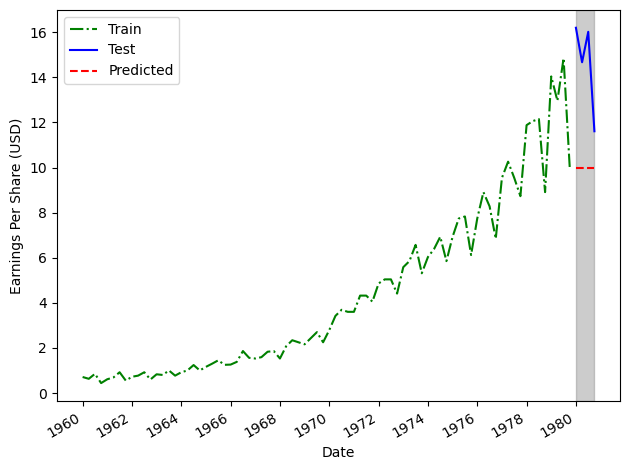

In [51]:
fig, ax = pt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label="Train")
ax.plot(test['date'], test['data'], 'b-', label="Test")
ax.plot(test['date'], test['pred_last'], 'r--', label="Predicted")
ax.set_xlabel("Date")
ax.set_ylabel("Earnings Per Share (USD)")
ax.axvspan(80, 83, color="#808080", alpha=0.4) #Draw a rectangular area to illustrate the forecast horizon
ax.legend(loc=2)
#xticks is to specify the label. We dont not want a crowded x-axis with unreadable labels. So, we use np.arange()
#0 is the starting index, 85 is the stopping index which is actually 84, and 8 is the steps because there are 8 quarters in 2 years.
#Then we specify an array containing the labels at each index, so it must stasrt with 1960 and end with 1980.
pt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
pt.tight_layout() 

This can be explained by the fact that EPS displays a cyclical behavior, where it is high during the first three quarters and then falls at the last quarter. Using  the last known value does not take the seasonality into account, so we need to use another naive forecasting technique to see if we can produce a better baseline.

# Implementing the Naive Seasonal Forecast

There are clear cyclical patterns in our data, and that is a piece of information that we could use to construct one last baseline: The naive seasonal forecast. This forecast takes the last observed cycle and repeats it into the future. In our case, a full cycle occurs in four quarters, so we will take the EPS from the first quarter of 1979 and predict that value for the first quarter of 1980. Then we'll take the EPS from the second quarter of 1979 and predict that value for the second quarter of 1980. This process will be repeated for the third and fourth quarters. 

In [53]:
test.loc[ : , 'pred_last_season'] = train['data'][-4:].values

In [54]:
test.head()

,date,data,pred_mean,pred_last_year_mean,pred_last,pred_last_season
80,1980-01-01,16.20,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [58]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
print(mape_naive_seasonal)

11.561658552433654


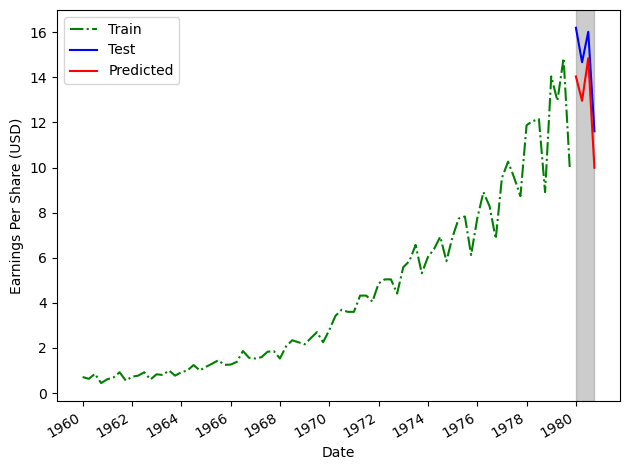

In [61]:
fig, ax = pt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label="Train")
ax.plot(test['date'], test['data'], 'b-', label="Test")
ax.plot(test['date'], test['pred_last_season'], 'r-', label="Predicted")
ax.legend(loc=2)
ax.set_xlabel("Date")
ax.set_ylabel("Earnings Per Share (USD)")
ax.axvspan(80, 83, color="#808080", alpha = 0.4)
pt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
pt.tight_layout()

As we can see, our naive seasonal forecast resulted in the lowest MAPE of all the baselines we built in this chapter. This means that seasonlity has a significant impact on future values, since repeating the last season into the future yields fairly accurate forecasts. Intuitively, this makes sense, because we can clearly observe a cylical pattern being repeated every year. Seasonal Effects will have to be considered when we develop a more complex forecasting model for this problem.

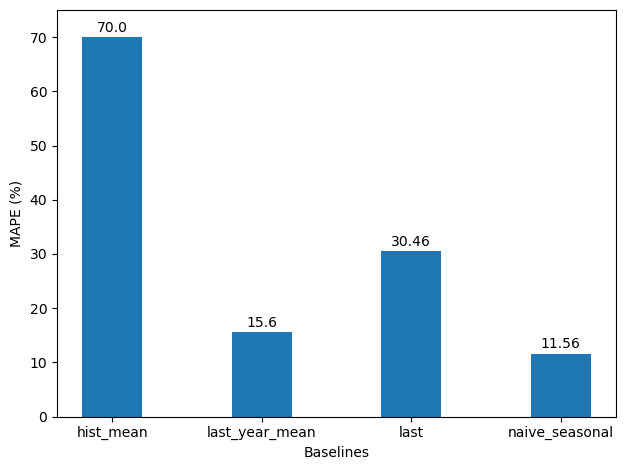

In [72]:
fig, ax = pt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

#Histogram
ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y): #Display the value on top of the bar 
    pt.text(x=index, y=value + 1, s=str(value), ha='center') #y= value + 1 is to position the text slightly above the bar so it does not overlap

pt.tight_layout()
